<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Classification_Rabiyathul_misriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('/content/iris (1).xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.shape

(150, 5)

In [5]:
data1=data.copy()
data1

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
data1.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
data1.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [8]:
data1['SL'] = data1['SL'].fillna(data1['SL'].median())
data1['SW'] = data1['SW'].fillna(data1['SW'].median())
data1['PL'] = data1['PL'].fillna(data1['PL'].median())

In [9]:
data1.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [10]:
data1.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.047333,3.780000,1.198667
std,0.808567,0.421995,1.729424,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
data1['SL'].unique()

array([5.1, 4.9, 5.8, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.7, 5.2, 4.7, 5.5,
       4.5, 5.3, 7. , 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7, 6.2,
       6.4, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [12]:
data1['SW'].unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 4. , 4.4, 3.8, 3.7, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [13]:
data1['PL'].unique()

array([1.4 , 1.3 , 1.5 , 1.7 , 1.6 , 1.1 , 1.2 , 1.  , 1.9 , 4.35, 4.7 ,
       4.5 , 4.9 , 4.  , 4.6 , 3.3 , 3.9 , 3.5 , 4.2 , 3.6 , 4.4 , 4.1 ,
       4.8 , 4.3 , 5.  , 3.8 , 3.7 , 5.1 , 3.  , 6.  , 5.9 , 5.6 , 5.8 ,
       6.6 , 6.3 , 5.3 , 5.5 , 6.7 , 6.9 , 5.7 , 6.1 , 6.4 , 5.4 , 5.2 ])

In [14]:
data1['PW'].unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [15]:
#encode categorical value
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [16]:
data1['Classification'] = encoder.fit_transform(data1[['Classification']])
data1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
x=data1.drop(['Classification'],axis=1)
y=data1['Classification']

**#train and test split**

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [19]:
x_train.shape

(120, 4)

In [20]:
x_test.shape

(30, 4)

**#model creation**

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=3000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision 1.0
Recall is 1.0
f1 score is 1.0


In [23]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

**K-NEAREST NEIGHBOUR**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(x_train,y_train)
  y_predk=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_predk)
  metric_k.append(acc)

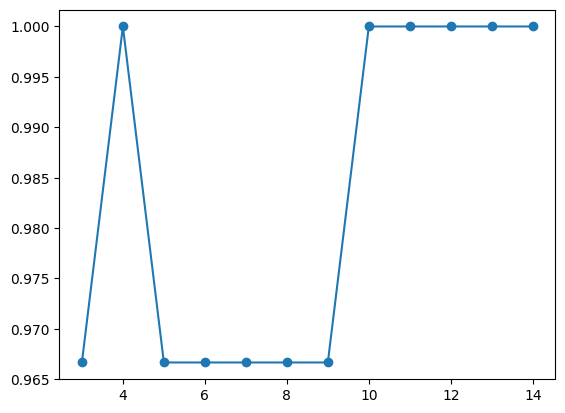

In [25]:
plt.plot(neighbors,metric_k,'o-')

In [37]:
print('Accuracy is', accuracy_score(y_test, y_predk))
print('Precision is', precision_score(y_test, y_predk,average='micro'))
print('Recall is', recall_score(y_test, y_predk,average='micro'))
print('f1 score is', f1_score(y_test,y_predk,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**SVM**

In [27]:
from sklearn.svm import SVC
sv_clf=SVC(kernel='linear')
sv_clf.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred=sv_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**Decision tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [40]:
y_pred=dt_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


**Random Forest**

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
y_pred=dt_clf.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0


In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf1 = RandomForestClassifier(criterion='Entropy',n_estimators=20)
rf_clf1 = RandomForestClassifier()
rf_clf1.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
y_pred=rf_clf1.predict(x_test)
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('f1 score is', f1_score(y_test,y_pred,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
f1 score is 1.0
